# Report - 服装分类

* 姓名：许浒
* 学号：2019200081


## 任务简介

FashionMNIST是一个服装图像集，包含60000训练集、10000测试集，输入服装图像后，搭建一个识别服装的机器学习模型，并对其他服装图片进行测试。

## 解决途径(DNN & CNN)

我分别使用了DNN和CNN进行训练，流程主要包括：
1. 读取文件，从网络下载得到训练集、训练集标签、测试集、测试集标签四个gz格式压缩包，用python-gzip可以从本地解析压缩包。
2. 每个样本输入的图像为28*28的图像，在归一化处理之后，导入模型。
3. 用tensflow机器学习框架，这里采用的是keras人工智能深度学习库，结合tensflow定义网络，其中输入层为28*28图像，输出层为10的向量，
4. DNN网络结构为784（28*28）->256->256->64->10，CNN网络结构为conv->maxpool->conv->maxpool->128->10。CNN网络中为了减少过拟合现象，使用了dropout层来随机去除一些训练参数。
5. 训练模型，重复训练10次，测试模型，输出准确率。
6. 由于淘宝目前对爬虫数据的监测，我直接从淘宝上下载了一张图片进行测试，从淘宝下载图像需要转化为28*28的灰度图，并且需要反向，白色部分为图片。图片处采用PIL，打开图片，转化为灰度图，缩小为28x28，通过numpy转化为矩阵，类型为float64,这样可以保证和训练集的图像各式相同。

## 总结
通过第三个大作业服装分类，让我对人工智能图像识别有初步了解，运用简单的人工神经网络来进行图像分析，学习了tensorflow机器学习框架和keras人工智能库，最终CNN测试集准确率为87.73%，DNN测试集的准确率为91.8%。并对淘宝下载的图像进行了测试，测试图像的过程中，学习利用PIL处理图像。这个大作业让我受益匪浅，对智能图像处理这门课有了进一步理解，提升了python代码能力。

## 程序如下：
打开一张淘宝的图像，并进行预测。


Epoch 1/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.6281 - accuracy: 0.7735
Epoch 2/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.4632 - accuracy: 0.8342
Epoch 3/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.4195 - accuracy: 0.8490
Epoch 4/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.3974 - accuracy: 0.8569
Epoch 5/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.3761 - accuracy: 0.8644
Epoch 6/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.3637 - accuracy: 0.8708
Epoch 7/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.3553 - accuracy: 0.8727
Epoch 8/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.3412 - accuracy: 0.8780
Epoch 9/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.3284 - accuracy: 0.8801
Epoch 10/10
10000/10000 [==============================

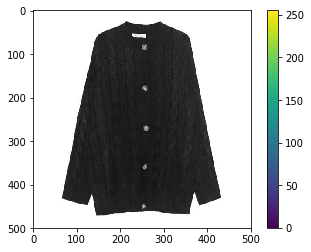

In [66]:
import keras
from keras.utils import get_file
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import gzip
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import PIL.ImageOps 

#从本地加载Fashion-minist数据库，解析四个gz压缩包
def load_data():
    base = "file:///C:/Users/xuhu/.spyder-py3/"
    files = [
        'train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz',
        't10k-labels-idx1-ubyte.gz', 't10k-images-idx3-ubyte.gz'
    ]

    paths = []
    for fname in files:
        paths.append(get_file(fname, origin=base + fname))

    with gzip.open(paths[0], 'rb') as lbpath:
        y_train = np.frombuffer(lbpath.read(), np.uint8, offset=8)

    with gzip.open(paths[1], 'rb') as imgpath:
        x_train = np.frombuffer(
            imgpath.read(), np.uint8, offset=16).reshape(len(y_train), 28, 28)

    with gzip.open(paths[2], 'rb') as lbpath:
        y_test = np.frombuffer(lbpath.read(), np.uint8, offset=8)

    with gzip.open(paths[3], 'rb') as imgpath:
        x_test = np.frombuffer(
            imgpath.read(), np.uint8, offset=16).reshape(len(y_test), 28, 28)

    return (x_train, y_train), (x_test, y_test)

#定义训练集，测试集
(train_images, train_labels), (test_images, test_labels) = load_data()

#定义标签
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#归一化处理
# (60000,28,28)->(60000,784)
train_images = train_images.reshape(train_images.shape[0],-1) / 255.0
test_images = test_images.reshape(test_images.shape[0],-1) / 255.0

# 换one hot格式
test_labels = np_utils.to_categorical(test_labels,num_classes=10)
train_labels = np_utils.to_categorical(train_labels,num_classes=10)

#定义DNN网络 784->256->256->64->10
model = keras.Sequential([
    keras.layers.Dense(units=256,input_dim=784,activation='relu'),
    keras.layers.Dense(units=256),
    keras.layers.Dense(units=64,activation='relu'),
    keras.layers.Dropout(0.35),
    keras.layers.Dense(units=10,activation='softmax'),
])

# 定义优化器,学习率为0.2
sgd = SGD(lr=0.2)

# 定义优化器，loss function
model.compile(
    optimizer = sgd,
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

#训练模型，共十个循环
model.fit(train_images,train_labels,epochs=10)

#测试模型
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('DNN Test accuracy:', test_acc)
test_loss, test_acc = model.evaluate(train_images, train_labels)
print('DNN train accuracy:', test_acc)

#打开一张淘宝的图片，并转化为灰度图
taobao_image0 = Image.open('C:/Users/xuhu/.spyder-py3/taobao.jpg').convert('L')

#显示图片
plt.figure()
plt.imshow(taobao_image0)
plt.colorbar()
plt.grid(False)

#图片预处理，颜色反相后转化为28*28的矩阵，再进行归一化处理,(28,28)->(1,28,28)
taobao_image0 = PIL.ImageOps.invert(taobao_image0)
taobao_image0 = taobao_image0.resize((28,28),Image.ANTIALIAS)
taobao_image0 = np.array(taobao_image0,dtype='float64')
taobao_image0 = taobao_image0[np.newaxis,:,:]
taobao_image0 = taobao_image0.reshape(1,-1) / 255.0

#图像预测，输出prediction数组中最大值的标签，为预测结果
predictions = model.predict(taobao_image0)
print('图片预测结果为:',class_names[np.argmax(predictions)])


Epoch 1/12
60000/60000 [==============================] - 75s 1ms/step - loss: 0.5141 - accuracy: 0.8134
Epoch 2/12
60000/60000 [==============================] - 76s 1ms/step - loss: 0.3457 - accuracy: 0.8741
Epoch 3/12
60000/60000 [==============================] - 77s 1ms/step - loss: 0.3006 - accuracy: 0.8897
Epoch 4/12
60000/60000 [==============================] - 79s 1ms/step - loss: 0.2775 - accuracy: 0.8981
Epoch 5/12
60000/60000 [==============================] - 76s 1ms/step - loss: 0.2586 - accuracy: 0.9044
Epoch 6/12
60000/60000 [==============================] - 77s 1ms/step - loss: 0.2454 - accuracy: 0.9101
Epoch 7/12
60000/60000 [==============================] - 77s 1ms/step - loss: 0.2322 - accuracy: 0.9128
Epoch 8/12
60000/60000 [==============================] - 77s 1ms/step - loss: 0.2249 - accuracy: 0.9164
Epoch 9/12
60000/60000 [==============================] - 77s 1ms/step - loss: 0.2158 - accuracy: 0.9204
Epoch 10/12
60000/60000 [==============================

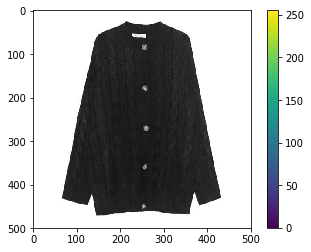

In [67]:
import keras
from keras.utils import get_file
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten
from keras.optimizers import Adam
import gzip
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import PIL.ImageOps 

#从本地加载Fashion-minist数据库，解析四个gz压缩包
def load_data():
    base = "file:///C:/Users/xuhu/.spyder-py3/"
    files = [
        'train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz',
        't10k-labels-idx1-ubyte.gz', 't10k-images-idx3-ubyte.gz'
    ]

    paths = []
    for fname in files:
        paths.append(get_file(fname, origin=base + fname))

    with gzip.open(paths[0], 'rb') as lbpath:
        y_train = np.frombuffer(lbpath.read(), np.uint8, offset=8)

    with gzip.open(paths[1], 'rb') as imgpath:
        x_train = np.frombuffer(
            imgpath.read(), np.uint8, offset=16).reshape(len(y_train), 28, 28)

    with gzip.open(paths[2], 'rb') as lbpath:
        y_test = np.frombuffer(lbpath.read(), np.uint8, offset=8)

    with gzip.open(paths[3], 'rb') as imgpath:
        x_test = np.frombuffer(
            imgpath.read(), np.uint8, offset=16).reshape(len(y_test), 28, 28)

    return (x_train, y_train), (x_test, y_test)

#定义训练集，测试集
(train_images, train_labels), (test_images, test_labels) = load_data()

#定义标签
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# (60000,28,28)->(60000,28,28,1)
#归一化处理
train_images = train_images.reshape(-1,28,28,1) / 255.0
test_images = test_images.reshape(-1,28,28,1) / 255.0
# 换one hot格式
test_labels = np_utils.to_categorical(test_labels,num_classes=10)
train_labels = np_utils.to_categorical(train_labels,num_classes=10)

# 定义顺序模型
model = Sequential()
#第一个卷积层(28,28,1)->(28,28,32)
model.add(Convolution2D(
    input_shape = (28,28,1),
    filters = 32,
    kernel_size = 5,
    strides = 1,
    padding = 'same',
    activation = 'relu'
))
# 第一个池化层（28,28,32)->(14,14,32)
model.add(MaxPooling2D(
    pool_size = 2,
    strides = 2,
    padding = 'same',
))
# 第二个卷积层(14,14,32)->(14,14,64)
model.add(Convolution2D(64,5,strides=1,padding='same',activation = 'relu'))
# 第二个池化层(14,14,64)->(7,7,64)
model.add(MaxPooling2D(2,2,'same'))
model.add(Dropout(0.35))
# 把第二个池化层的输出扁平化为1维(7,7,64)->3136
model.add(Flatten())
# 第一个全连接层 3136->128
model.add(Dense(128,activation = 'relu'))
# 为了防止过拟合，增加一个Dropout层
model.add(Dropout(0.5))
# 第二个全连接层128->10
model.add(Dense(10,activation='softmax'))

# 定义优化器，学习率为0.001
adam = Adam(lr=1e-3)
# 定义优化器，loss function
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#训练模型
model.fit(train_images,train_labels,epochs=12)

#测试模型
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('CNN Test accuracy:', test_acc)

#test_loss, test_acc = model.evaluate(train_images, train_labels)
print('CNN train accuracy:', test_acc)

#打开一张淘宝的图片，并转化为灰度图
taobao_image0 = Image.open('C:/Users/xuhu/.spyder-py3/taobao.jpg').convert('L')

#显示图片
plt.figure()
plt.imshow(taobao_image0)
plt.colorbar()
plt.grid(False)

#图片预处理，颜色反相后转化为28*28的矩阵，再进行归一化处理
taobao_image0 = PIL.ImageOps.invert(taobao_image0)
taobao_image0 = taobao_image0.resize((28, 28),Image.ANTIALIAS)
taobao_image0 = np.array(taobao_image0,dtype='float64')
taobao_image0 = taobao_image0[np.newaxis,:,:]
taobao_image0 = taobao_image0.reshape(1,28,28,1) / 255.0

#图像预测，输出prediction数组中最大值的标签，为预测结果
predictions = model.predict(taobao_image0)
print('图片预测结果为:',class_names[np.argmax(predictions)])
